## Author : Ben madani Yazid

<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET OF DATA SCIENCE</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Bank Customer Churn
</h2>
</div>

## Table Of Content


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Importation of librairies</h3>
</div>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# data manip
import pandas as pd
import numpy as np
# viz
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('../Data/BCC.csv', sep=',')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describing of the Data

* customer_id: Unique identifier for each customer.
* credit_score: Numerical assessment of creditworthiness.
* Geography: Country of residence or operation.
* gender: Gender of the customer.
* age: Age of the customer.
* tenure: Length of time as a customer.
* balance: Amount of money in the customer's account.
* products_number: Number of financial products/services the customer has.
* credit_card: Binary indicator for whether the customer has a credit card.
* active_member: Binary indicator for active membership status.
* estimated_salary: Estimated salary or income of the customer.
* churn: Binary indicator for customer churn (account closure or service discontinuation).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


* data without nan values
* shape is (10000,11)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> First Insights</h3>
</div>

In [5]:
# first insights about data
print('Total number of clients is:', data['customer_id'].nunique(), 'clients')
print('number of churn clients is :', data.loc[data['churn'] == 1]['churn'].count(), 'clients' )
print('number of non churn clients is :', data.loc[data['churn'] == 0]['churn'].count(), 'clients' )
churn = data.loc[data['churn'] == 1]['churn'].count()
nonchurn = data.loc[data['churn'] == 0]['churn'].count()
print('the percentige of churn clients is:', (churn * 100) / len(data.churn), '%')
print('the percentige of non-churn clients is:', (nonchurn * 100) / len(data.churn), '%')
print('Total number of products is:', data['products_number'].nunique(), 'products')
print('number of clients have cards is :', data.loc[data['credit_card'] == 1]['credit_card'].count(), 'cards' )
print('number of clients have cards is :', data.loc[data['credit_card'] == 0]['credit_card'].count(), 'cards' )
withcc = data.loc[data['credit_card'] == 1]['credit_card'].count()
withoutcc = data.loc[data['credit_card'] == 0]['credit_card'].count()
print('the percentige of clients  have credit card is:', (withcc * 100) / len(data.credit_card), '%')
print('the percentige of clients not have credit card is:', (withoutcc * 100) / len(data.credit_card), '%')

print('number of active_member is :', data.loc[data['active_member'] == 1]['active_member'].count(), 'active_members' )
print('number of inctive_member is :', data.loc[data['active_member'] == 0]['active_member'].count(), 'active_members' )
print('our clients from:', data['country'].unique())
print('the sex of our clients is :', data.loc[data['gender'] == 'Male']['gender'].count(), 'Male' )
print('the sex of our clients is :', data.loc[data['gender'] == 'Female']['gender'].count(), 'Female' )
male = data.loc[data['gender'] == 'Male']['gender'].count()
female =  data.loc[data['gender'] == 'Female']['gender'].count()
print('the percentige of male clients is:', (male * 100) / len(data.gender), '%')
print('the percentige of female clients is:', (female * 100) / len(data.gender), '%')

Total number of clients is: 10000 clients
number of churn clients is : 2037 clients
number of non churn clients is : 7963 clients
the percentige of churn clients is: 20.37 %
the percentige of non-churn clients is: 79.63 %
Total number of products is: 4 products
number of clients have cards is : 7055 cards
number of clients have cards is : 2945 cards
the percentige of clients  have credit card is: 70.55 %
the percentige of clients not have credit card is: 29.45 %
number of active_member is : 5151 active_members
number of inctive_member is : 4849 active_members
our clients from: ['France' 'Spain' 'Germany']
the sex of our clients is : 5457 Male
the sex of our clients is : 4543 Female
the percentige of male clients is: 54.57 %
the percentige of female clients is: 45.43 %


* we can see that our target variable 'churn' have imbalanced data 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Visualisations to understand th data</h3>
</div>

<Axes: xlabel='active_member', ylabel='count'>

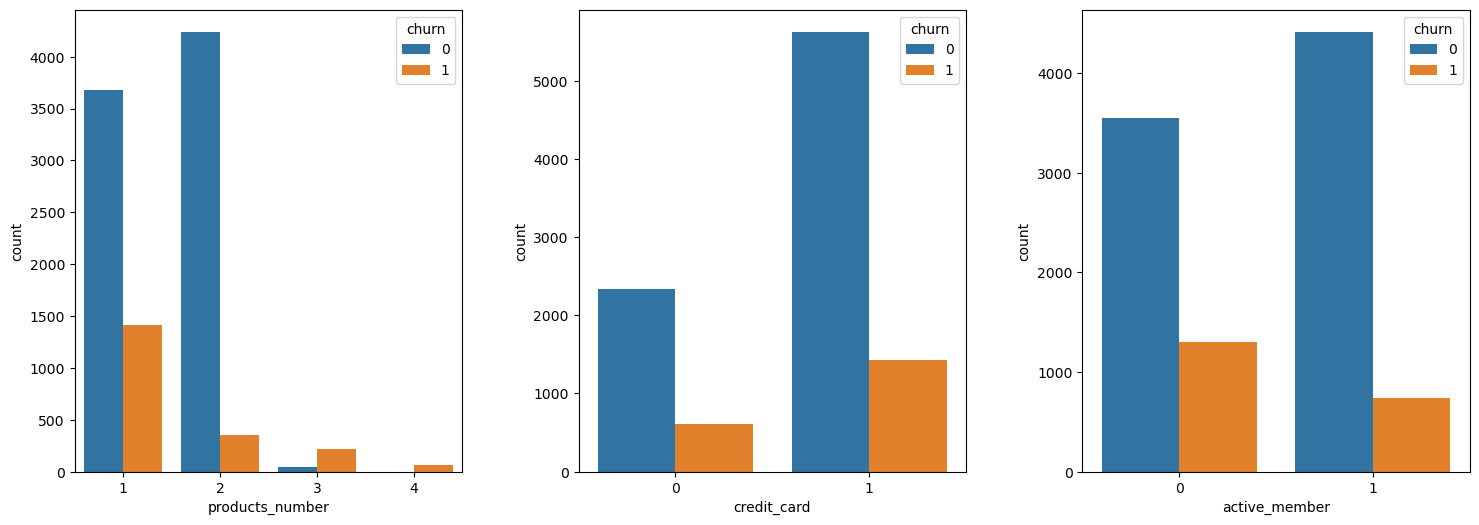

In [6]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "products_number", hue="churn", data = data, ax= ax[0])
sns.countplot(x = "credit_card", hue="churn", data = data, ax = ax[1])
sns.countplot(x = "active_member", hue="churn", data = data, ax = ax[2])

* clients have credit card churn more
* client chose 3,4 product churn more
* inactive members churn more
* number of active_member is : 5151 active_members  
* number of inctive_member is : 4849 active_members
* Some customers might be using the bank's services less frequently but are still maintaining their accounts, leading to a high number of inactive members

<Axes: xlabel='gender', ylabel='count'>

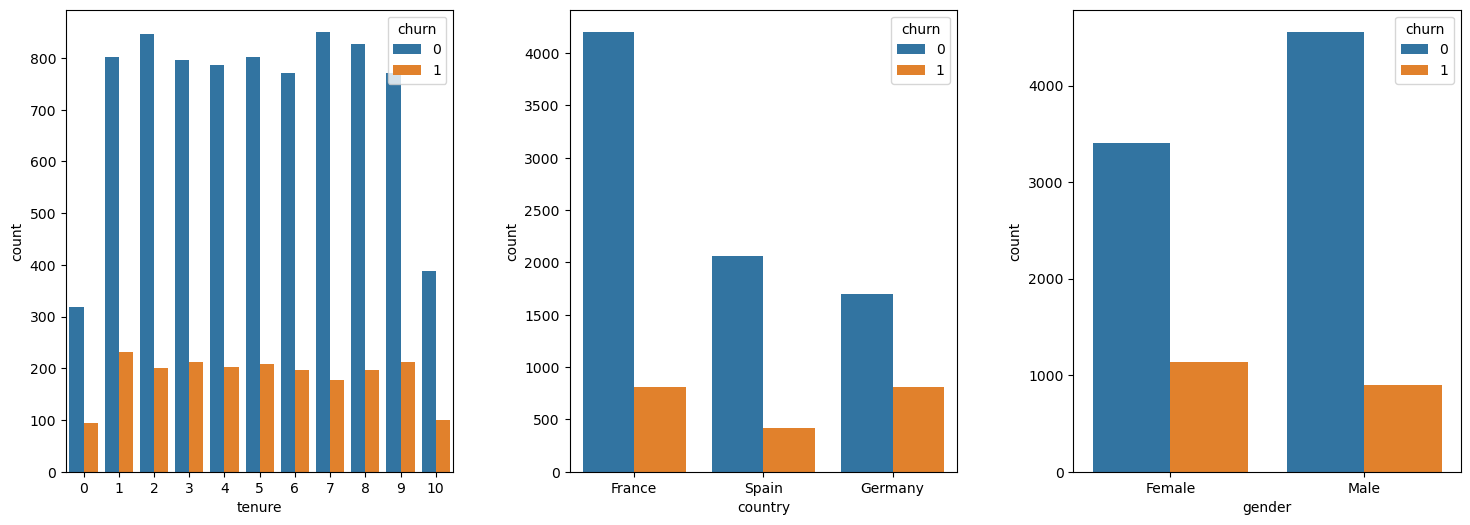

In [7]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "tenure", hue="churn", data = data, ax= ax[0])
sns.countplot(x = "country", hue="churn", data = data, ax = ax[1])
sns.countplot(x = "gender", hue="churn", data = data, ax = ax[2])



* half of clients from france, 25.1 % from germany, 24.8 % from spain
* the percentige of male clients is: 54.57 %
* most tenure between 1-9 its clients churn most
* female churn most
* clients from germany churn most


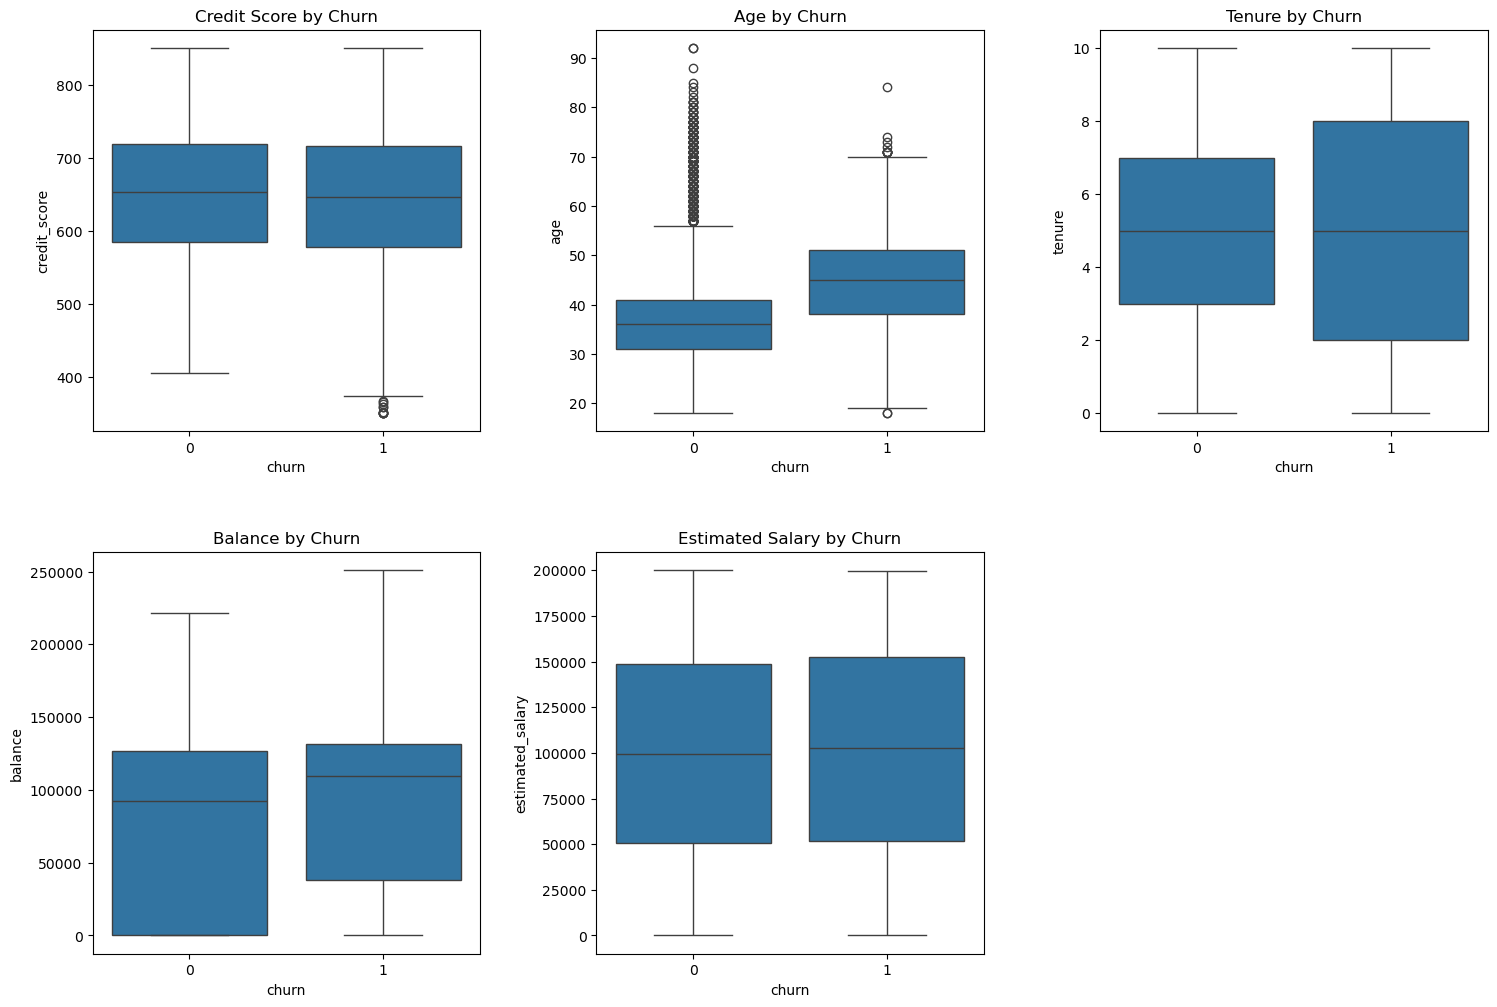

In [8]:
_, ax = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot boxplots for each feature by churn
sns.boxplot(x='churn', y='credit_score', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Credit Score by Churn')

sns.boxplot(x='churn', y='age', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Age by Churn')

sns.boxplot(x='churn', y='tenure', data=data, ax=ax[0, 2])
ax[0, 2].set_title('Tenure by Churn')

sns.boxplot(x='churn', y='balance', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Balance by Churn')

sns.boxplot(x='churn', y='estimated_salary', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Estimated Salary by Churn')

# Hide the unused subplot
ax[1, 2].axis('off')
 
plt.show()

* credit score : churn clients have slightly median, also some clients have < 400
* the median age of churn client is around 45, indicate older clients churn more
* The tenure is roughly the same across all countries (around 5 years) which mean we should propose some strategies to keep clients
* balance : clients with high balance churn more, same for low balance
* salary not a problem for churn

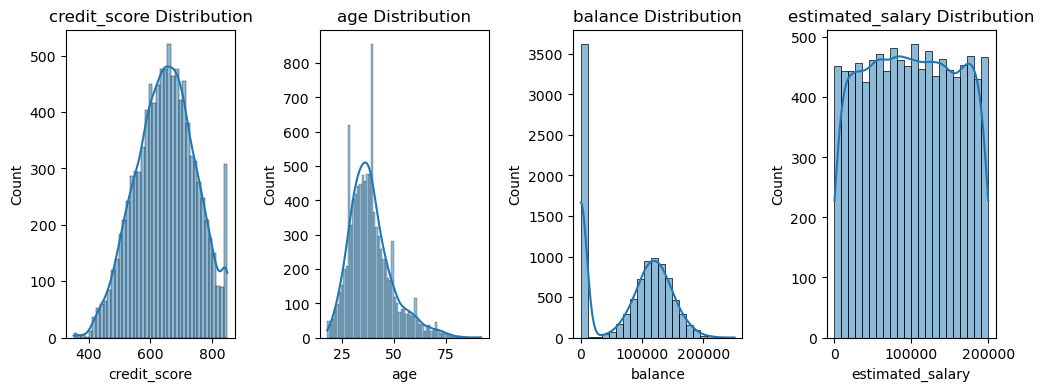

In [9]:
# List of numerical features
numerical_features = ['credit_score', 'age',  'balance', 'estimated_salary']

# Create subplots
fig, axes = plt.subplots(1, len(numerical_features), figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

# Plot distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

# Show plot
plt.show()

* Credit Score: The distribution is approximately normal but slightly skewed to the right.
* The age distribution is right-skewed.
* A large number of entries have a balance of zero, indicating many customers might not maintain a balance.

In [10]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Recap before  training the model


- To handle the outliers i will scale data using StandardScaler, also in business understanding. i will see if i do the same for features like age bins, balance, salary, score.
- i will encode data into binary like gender
- One-Hot Encoding for country feature
- delete customerid because identical Feature does not make any impact
- create heatmap to see the correlation, this will help selecting best features
- split the data then try diffrent models but i will focus on 1 label since we have imbalanced data



In [12]:
data.to_csv(r'C:\Users\yazid\Desktop\mon pt revision\My epita courses\Data Science Projects\Bank Customer Churn\Data\data.csv', index=False)